# 1. Setup

In [41]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

# 2.Getting data

In [43]:
import requests
import zipfile
from pathlib import Path

data_path = Path('data/')
image_path = data_path/'CIFAR10'

if image_path.is_dir():
    print('Image path already exist')
else:
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path/'CIFAR10.zip','wb') as f:
        request = requests.get('https://github.com/cyizhuo/CIFAR-10-dataset/archive/refs/heads/main.zip')
        f.write(request.content)
        print('File downloaded')

    with zipfile.ZipFile(data_path/'CIFAR10.zip','r') as zip_ref:
        zip_ref.extractall(image_path)
        print('File extracted')


Image path already exist


In [44]:
image_path = data_path/'CIFAR10'/'CIFAR-10-dataset-main'
image_path

WindowsPath('data/CIFAR10/CIFAR-10-dataset-main')

In [45]:
import os
for dir_path, dir_names,file_names in os.walk(image_path):
    print(f'There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}')

There are 2 directories and 1 images in data\CIFAR10\CIFAR-10-dataset-main
There are 10 directories and 0 images in data\CIFAR10\CIFAR-10-dataset-main\test
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\airplane
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\automobile
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\bird
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\cat
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\deer
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\dog
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\frog
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\horse
There are 0 directories and 1000 images in data\CIFAR10\CIFAR-10-dataset-main\test\ship
There are 0 directories and 1000 images in 

In [46]:
train_dir = image_path/'train'
test_dir = image_path/'test'
train_dir, test_dir

(WindowsPath('data/CIFAR10/CIFAR-10-dataset-main/train'),
 WindowsPath('data/CIFAR10/CIFAR-10-dataset-main/test'))

Path: data\CIFAR10\CIFAR-10-dataset-main\train\cat\cat_s_000275.png
Class: cat


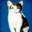

In [47]:
import random
from PIL import Image

image_path_list = list(image_path.glob('*/*/*.png'))

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem

img_sample = Image.open(random_image_path)

print(f'Path: {random_image_path}')
print(f'Class: {image_class}')
# print(f'Size: {img.height} x {img.width}')
img_sample

In [48]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [49]:
data_transform = transforms.Compose([transforms.ToTensor()])

In [50]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
print(f'Train data: {train_data}, test data: {test_data}')

Train data: Dataset ImageFolder
    Number of datapoints: 50000
    Root location: data\CIFAR10\CIFAR-10-dataset-main\train
    StandardTransform
Transform: Compose(
               ToTensor()
           ), test data: Dataset ImageFolder
    Number of datapoints: 10000
    Root location: data\CIFAR10\CIFAR-10-dataset-main\test
    StandardTransform
Transform: Compose(
               ToTensor()
           )


In [51]:
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
img, label = train_data[0][0], train_data[0][1]
print(f'Image: {img}')
print(f'Shape: {img.shape}')
print(f'Type: {img.dtype}')
print(f'Label: {label}')


Image: tensor([[[0.7961, 0.7882, 0.8471,  ..., 0.8824, 0.8824, 0.8902],
         [0.4471, 0.7059, 0.9098,  ..., 0.9529, 0.9490, 0.9451],
         [0.2118, 0.4941, 0.8980,  ..., 0.9804, 0.9765, 0.9725],
         ...,
         [0.2667, 0.2078, 0.2078,  ..., 0.2667, 0.2549, 0.2588],
         [0.2588, 0.2078, 0.2078,  ..., 0.2941, 0.3294, 0.3412],
         [0.1647, 0.1608, 0.1804,  ..., 0.3412, 0.3647, 0.3725]],

        [[0.8039, 0.8627, 0.8510,  ..., 0.9098, 0.9098, 0.9176],
         [0.4039, 0.7490, 0.9059,  ..., 0.9725, 0.9686, 0.9686],
         [0.1098, 0.5020, 0.8941,  ..., 0.9882, 0.9843, 0.9843],
         ...,
         [0.2588, 0.2000, 0.2039,  ..., 0.2353, 0.2353, 0.2510],
         [0.2588, 0.2118, 0.2118,  ..., 0.2784, 0.3059, 0.3176],
         [0.1765, 0.1725, 0.1961,  ..., 0.3373, 0.3451, 0.3412]],

        [[0.8588, 0.9176, 0.9686,  ..., 0.9725, 0.9765, 0.9843],
         [0.4118, 0.7608, 0.9961,  ..., 0.9961, 0.9882, 0.9804],
         [0.0784, 0.4706, 0.9529,  ..., 0.9843, 0.9

Text(0.5, 1.0, 'airplane')

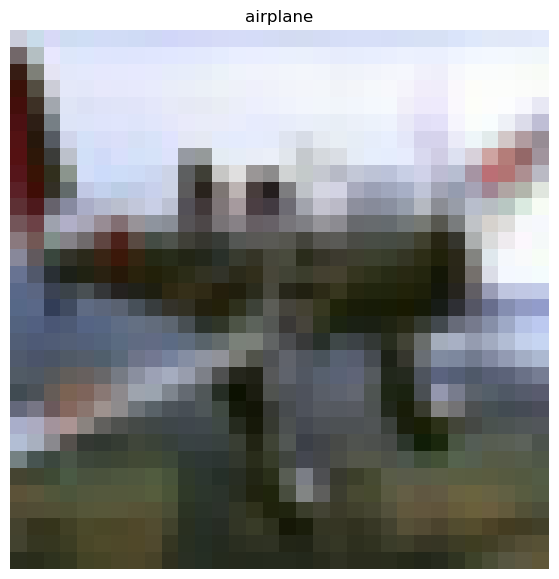

In [53]:
plt.figure(figsize=(10,7))
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.title(class_names[label])

In [54]:
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_data,
                              shuffle=True,
                              batch_size=4,
                              num_workers=NUM_WORKERS)
test_dataloader = DataLoader(dataset= test_data,
                             batch_size=4,
                             num_workers=NUM_WORKERS,
                             shuffle=False)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 50000
     Root location: data\CIFAR10\CIFAR-10-dataset-main\train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 10000
     Root location: data\CIFAR10\CIFAR-10-dataset-main\test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [55]:
img, label =next(iter(train_dataloader))
print(f'Image shape:{img.shape}')

Image shape:torch.Size([4, 3, 32, 32])


In [56]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
wieghts = torchvision.models.ResNet18_Weights.DEFAULT
model = torchvision.models.resnet18(weights=wieghts).to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [57]:
output_shape=len(class_names)
model.fc = nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(
        in_features=512,
        out_features=output_shape,
        bias=True)).to(device)

In [58]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [59]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(params=model.parameters(),lr=0.001)

In [60]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()

    train_loss =0
    train_acc = 0
    for batch, (X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_logits=model(X)
        y_prob=torch.softmax(y_logits,dim=1)
        y_label=torch.argmax(y_prob,dim=1)
        
        loss = loss_fn(y_logits,y)
        train_acc += (y==y_label).sum().item()/len(y_label)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch%400==0:
            print(f'Looked at: {batch*len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss,train_acc
    

In [61]:
def test_step(model, dataloader,loss_fn):
    model.eval()
    test_loss=0
    test_acc=0
    with torch.inference_mode():
        for batch, (X,y) in enumerate(dataloader):
            X,y=X.to(device),y.to(device)
            y_logits=model(X)
            y_prob=torch.softmax(y_logits,dim=1)
            y_label=torch.argmax(y_prob,dim=1)

            loss=loss_fn(y_logits,y)
            test_loss += loss.item()
            test_acc += (y_label==y).sum().item()/len(y_label)
    test_loss /= len(dataloader)
    test_acc/=len(dataloader)
    return test_loss, test_acc

In [62]:
from tqdm.auto import tqdm
def train(model, train_dataloader, test_dataloader, loss_fn, optimizer, epochs=5):
    results = {'train_loss':[],'train_acc':[],'test_loss':[],'test_acc':[]}
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc=train_step(model,train_dataloader,loss_fn,optimizer)
        test_loss,test_acc=test_step(model, test_dataloader,loss_fn)
        print(f'Epoch: {epoch+1}, train loss: {train_loss}, train acc: {train_acc}%, test loss:{test_loss}, test acc: {test_acc}%')
        results['train_loss'].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results['test_loss'].append(test_loss)
        results['train_acc'].append(train_acc)
        results['test_acc'].append(test_acc)
    return results

In [63]:
EPOCHS=5
from timeit import default_timer as timer
start_time = timer()
model_results=train(model,train_dataloader,test_dataloader,loss_fn,optimizer,epochs=EPOCHS)
end_time=timer()
print(f'Train time: {end_time-start_time}')

  0%|          | 0/5 [00:00<?, ?it/s]

Looked at: 0/50000 samples
Looked at: 1600/50000 samples
Looked at: 3200/50000 samples
Looked at: 4800/50000 samples
Looked at: 6400/50000 samples
Looked at: 8000/50000 samples
Looked at: 9600/50000 samples
Looked at: 11200/50000 samples
Looked at: 12800/50000 samples
Looked at: 14400/50000 samples
Looked at: 16000/50000 samples
Looked at: 17600/50000 samples
Looked at: 19200/50000 samples
Looked at: 20800/50000 samples
Looked at: 22400/50000 samples
Looked at: 24000/50000 samples
Looked at: 25600/50000 samples
Looked at: 27200/50000 samples
Looked at: 28800/50000 samples
Looked at: 30400/50000 samples
Looked at: 32000/50000 samples
Looked at: 33600/50000 samples
Looked at: 35200/50000 samples
Looked at: 36800/50000 samples
Looked at: 38400/50000 samples
Looked at: 40000/50000 samples
Looked at: 41600/50000 samples
Looked at: 43200/50000 samples
Looked at: 44800/50000 samples
Looked at: 46400/50000 samples
Looked at: 48000/50000 samples
Looked at: 49600/50000 samples
Epoch: 1, train lo

In [64]:
y_preds=[]
model.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader):
        X,y=X.to(device),y.to(device)
        y_logits=model(X)
        y_prob=torch.softmax(y_logits,dim=1)
        y_pred=torch.argmax(y_prob,dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
        

  0%|          | 0/2500 [00:48<?, ?it/s]

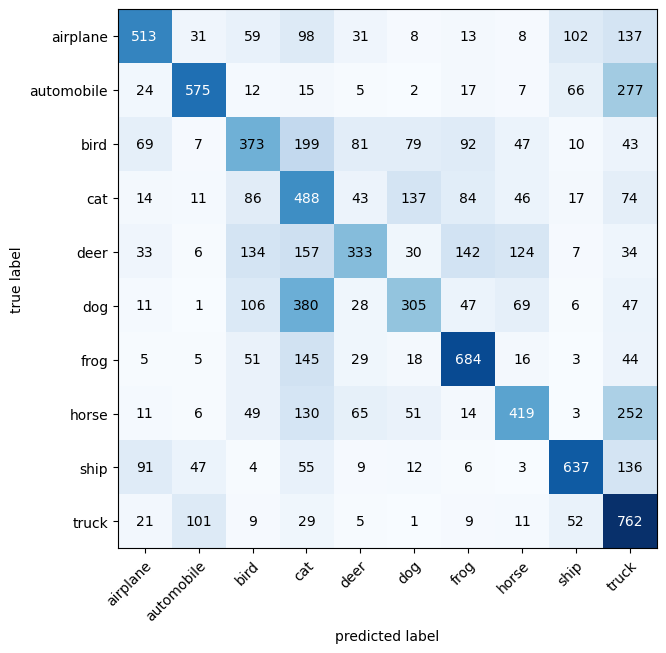

In [65]:
import mlxtend
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=torch.tensor(test_data.targets))

fix,ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                             class_names=class_names,
                             figsize=(10,7));

In [66]:
import cv2
sample_image_path_1='data/CIFAR10/CIFAR-10-dataset-main/test/airplane/aeroplane_s_000002.png'
sample_image_1 = cv2.imread(sample_image_path_1)

In [67]:
sample_image_1=data_transform(sample_image_1)
print(sample_image_1.shape, sample_image_1.dtype)

torch.Size([3, 32, 32]) torch.float32


In [68]:
model.eval()
with torch.inference_mode():
    sample_image_1_pred=model(sample_image_1.unsqueeze(dim=0).to(device))

In [69]:
sample_image_1_prob=torch.softmax(sample_image_1_pred,dim=1)
sample_image_1_label=torch.argmax(sample_image_1_prob,dim=1)
print(f'Prediction:{class_names[sample_image_1_label.cpu()]}')

Prediction:truck


In [70]:
sample_image_path_2='data/CIFAR10/CIFAR-10-dataset-main/test/truck/aerial_ladder_truck_s_000002.png'
sample_image_2=cv2.imread(sample_image_path_2)

In [71]:
sample_image_2=data_transform(sample_image_2)
model.eval()
with torch.inference_mode():
    sample_image_2_pred=model(sample_image_2.unsqueeze(dim=0).to(device))

In [72]:
sample_image_2_prob=torch.softmax(sample_image_2_pred,dim=1)
sample_image_2_label=torch.argmax(sample_image_2_prob,dim=1)
print(f'Prediction: {class_names[sample_image_2_label.cpu()]}')

Prediction: automobile
